In [31]:
import numpy as np
import matplotlib.pyplot as plt
from kl_divergence.linear import gamma_linear
from kl_divergence.sigmoid import gamma_sigmoid
from kl_divergence.cyclical import gamma_cyclical

ValueError: x and y must have same first dimension, but have shapes (800,) and (1,)

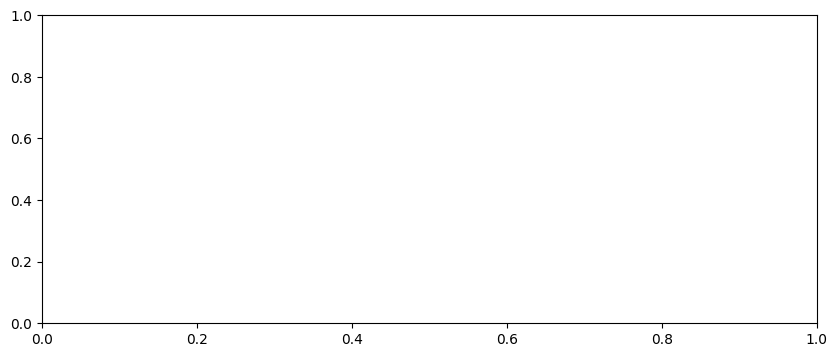

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def to_array_from_func(func, epochs: int):
    if not callable(func):
        raise TypeError("func must be callable, like func(epoch)->float")
    epochs = int(epochs)
    return np.array([func(e) for e in range(1, epochs + 1)], dtype=float)


# -----------------------------
# 3) 사용 예시 (요청하신 형태 그대로)
# -----------------------------
epochs = 800

g_linear  = gamma_linear(epochs,gamma_max=0.1, warmup_epochs=200)
g_sigmoid = gamma_sigmoid(epochs, gamma_max=0.1, center=300, steepness=0.3)  # 0.3이면 너무 급격합니다.
g_cyc     = gamma_cyclical(epochs, gamma_max=0.1, cycle_len=200, ratio=0.5)

plt.figure(figsize=(10,4))
plt.plot(range(1, epochs+1), g_linear,  label="Linear")
plt.plot(range(1, epochs+1), g_sigmoid, label="Sigmoid")
plt.plot(range(1, epochs+1), g_cyc,     label="Cyclical")
plt.legend()
plt.show()

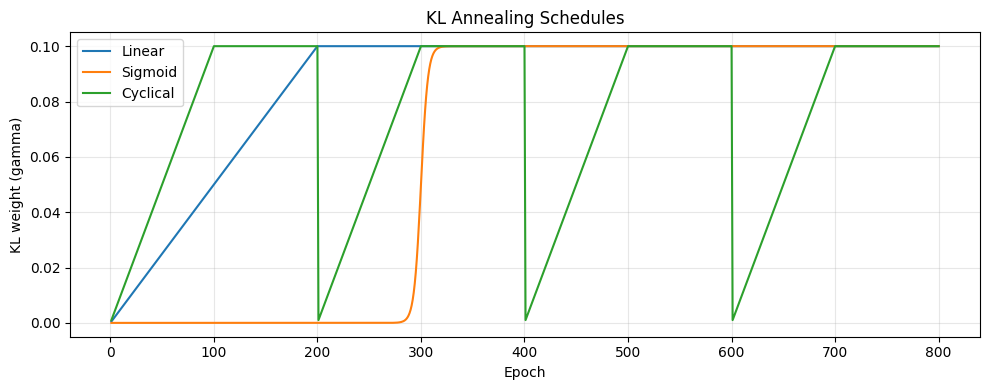

In [39]:
import numpy as np
import matplotlib.pyplot as plt

epochs = 800

g_linear  = np.array([gamma_linear(e,  gamma_max=0.1, warmup_epochs=200) for e in range(1, epochs+1)])
g_sigmoid = np.array([gamma_sigmoid(e, gamma_max=0.1, center=300, steepness=0.3) for e in range(1, epochs+1)])
g_cyc     = np.array([gamma_cyclical(e, gamma_max=0.1, cycle_len=200, ratio=0.5) for e in range(1, epochs+1)])

plt.figure(figsize=(10,4))
plt.plot(range(1, epochs+1), g_linear,  label="Linear")
plt.plot(range(1, epochs+1), g_sigmoid, label="Sigmoid")
plt.plot(range(1, epochs+1), g_cyc,     label="Cyclical")
plt.xlabel("Epoch")
plt.ylabel("KL weight (gamma)")
plt.title("KL Annealing Schedules")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
